<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<img src = "https://github.com/Jangrae/img/blob/master/medical2.png?raw=true" width=800 align="left"/>

# 실습 내용

- 다양한 알고리즘으로 모델을 만들고 성능을 예측합니다.
- 성능이 좋을 것으로 판단된 모델의 성능을 튜닝합니다.
- 튜닝된 모델의 성능을 평가합니다.

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [2]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

In [3]:
# 데이터 불러오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/insurance.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [4]:
# 데이터 살펴보기
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**데이터 설명**

- age: 나이
- sex: 성별(female, male)
- bmi: 체질량지수(체중을 키의 제곱으로 나눈 값, 적정수준:18.5 - 24.9)
- children: 자녀 수
- smoker: 흡연 여부
- region: 거주지역(northeast, southeast, southwest, northwest)
- charges: 건강보험에서 지불한 의료비 - Target

In [5]:
# 기술통계 확인
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) x, y 분리**

In [6]:
# target 확인
target = 'charges'

# 데이터 분리
x = data.drop(target, axis=1)
y = data.loc[:, target]


**2) 가변수화**

In [7]:
# 가변수화 대상: sex, smoker, region
dummy_cols = ['sex', 'smoker', 'region']

# 가변수화
x = pd.get_dummies(x, columns= dummy_cols, drop_first= True)

# 확인
x.head(1)

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,0,1,0,0,1


**3) 학습용, 평가용 데이터 분리**

In [8]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)

**4) 정규화**

In [9]:
# 모듈 불러오기
from sklearn.preprocessing import MinMaxScaler

# 정규화
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)



# 4.성능 예측

- 여러 알고리즘으로 모델을 만들고 K-Fold CV로 성능을 예측합니다.
- 하이퍼파라미터를 설정하지 않고 진행합니다.
- 각 모델의 성능 정보를 수집해 마지막에 비교합니다.

In [10]:
# xgboost 설치
# pip install xgboost

In [11]:
# lightgbm 설치
# pip install lightgbm

- 이후 사용할 함수를 모두 불러옵니다.

In [12]:
# 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

from sklearn.metrics import *

**1) Linear Regression**

- Linear Regression 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [13]:
# 선언하기
model = LinearRegression()

In [14]:
# 성능예측
cv_score = cross_val_score(model, x_train, y_train, cv = 10, scoring= 'r2')

In [15]:
# 결과확인
print(cv_score)
print(cv_score.mean())

[0.68733129 0.72630945 0.82457396 0.73764922 0.71314841 0.75100487
 0.71858438 0.69926087 0.78120491 0.81257551]
0.7451642881870868


In [16]:
# 결과수집
result = {}
result['Linear Regression'] = cv_score.mean()

**2) KNN**

- KNN 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [17]:
# 선언하기
model = KNeighborsRegressor(n_neighbors = 5)

In [18]:
# 성능예측
cv_score = cross_val_score(model, x_train_s, y_train, cv = 10, scoring='r2')

In [19]:
# 결과확인
print(cv_score)
print(cv_score.mean())

[0.69551237 0.69648785 0.77699225 0.72284561 0.69937007 0.70712044
 0.70168701 0.7121731  0.78219423 0.76965699]
0.72640399198177


In [20]:
# 결과수집
result['KNeighborsRegressor'] = cv_score.mean()

**3) Decision Tree**

- Decision Tree 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [21]:
# 선언하기
model = DecisionTreeRegressor(max_depth= 3, random_state= 1)

In [22]:
# 성능예측
cv_score = cross_val_score(model, x_train, y_train, cv = 10, scoring='r2')

In [23]:
# 결과확인
print(cv_score)
print(cv_score.mean())

[0.81152854 0.81658576 0.90498827 0.84306252 0.82247477 0.85383838
 0.84780011 0.75975358 0.86389772 0.91370703]
0.8437636667428686


In [24]:
# 결과수집
result['Decision Tree Regressor'] = cv_score.mean()

**4) SVM**

- SVM 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [25]:
# 선언하기
model = SVR(kernel= 'poly', C=2000)

In [26]:
# 성능예측
cv_score = cross_val_score(model, x_train_s, y_train, cv = 10, scoring='r2')

In [27]:
# 결과확인
print(cv_score)
print(cv_score.mean())

[0.69766759 0.81702023 0.88035226 0.80300379 0.81159032 0.80942866
 0.80507403 0.74966513 0.83909391 0.88015986]
0.8093055759671423


In [28]:
# 결과수집
result['SVR'] = cv_score.mean()

**5) Random Forest**

- Random Forest 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [29]:
# 선언하기
model = RandomForestRegressor(max_depth= 5, random_state= 1)

In [30]:
# 성능예측
cv_score = cross_val_score(model, x_train, y_train, cv = 10, scoring='r2')

In [31]:
# 결과확인
print(cv_score)
print(cv_score.mean())

[0.81238933 0.8332142  0.91786186 0.83404704 0.80771592 0.86697186
 0.84340823 0.7837287  0.87700793 0.92186844]
0.8498213511567965


In [32]:
# 결과수집
result['Random Forest Regressor'] = cv_score.mean()

**6) XGBoost**

- XGBoost 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [33]:
# 선언하기
model = XGBRegressor(max_depth = 5, random_state = 1)

In [34]:
# 성능예측
cv_score = cross_val_score(model, x_train, y_train, cv = 10, scoring= 'r2')

In [35]:
# 결과확인
print(cv_score)
print(cv_score.mean())

[0.78966277 0.76601494 0.88610547 0.7776082  0.76675421 0.82754966
 0.76869624 0.73094793 0.84843709 0.90927409]
0.8071050612632508


In [36]:
# 결과수집
result['XGBRegressor'] = cv_score.mean()

**7) LightGBM**

- LightGBM 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [37]:
# 선언하기
model = LGBMRegressor(max_depth=5, random_state=1)

In [38]:
# 성능예측
cv_score = cross_val_score(model, x_train, y_train, cv = 10, scoring='r2')

In [39]:
# 결과확인
print(cv_score)
print(cv_score.mean())

[0.75902697 0.82638807 0.92522651 0.84093725 0.82183772 0.85560364
 0.83143809 0.77370395 0.87010531 0.90238819]
0.8406655696607714


In [40]:
# 결과수집
result['LGBMRegressor'] = cv_score.mean()

# 5.결과 확인

- 예측된 각 모델의 성능을 비교합니다.

In [41]:
# 성능 비교
print('=' * 40)
for m_name, score in result.items():
    print(m_name, score.round(3))
print('=' * 40)

Linear Regression 0.745
KNeighborsRegressor 0.726
Decision Tree Regressor 0.844
SVR 0.809
Random Forest Regressor 0.85
XGBRegressor 0.807
LGBMRegressor 0.841


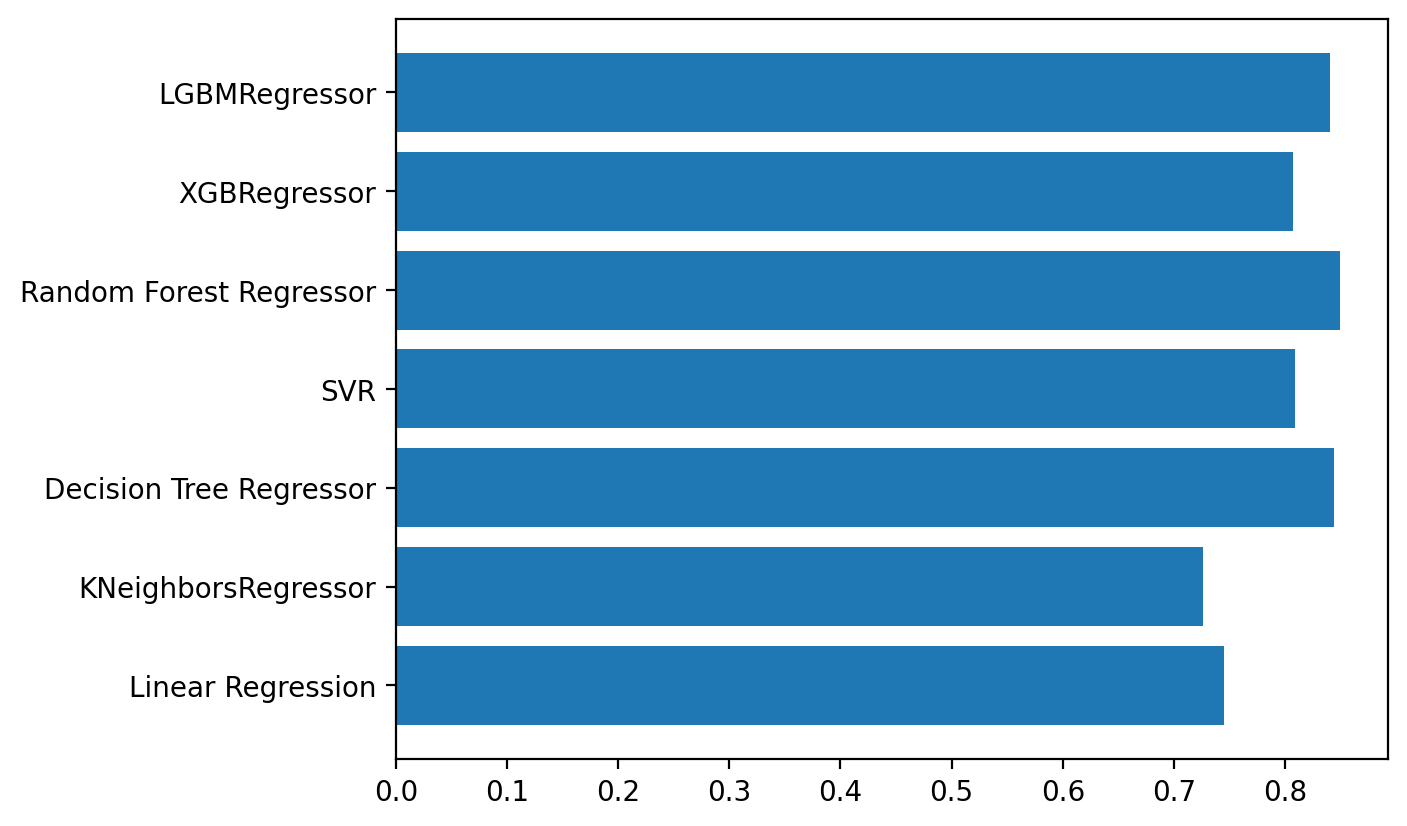

In [42]:
# 성능 시각화 비교
plt.barh(list(result.keys()), result.values())
plt.show()

# 6.성능 튜닝

- 위에서 성능이 가장 좋을 것으로 예측된 모델을 튜닝합니다.
- 본 실습에서는 Random Forest 모델 성능을 튜닝합니다.

In [53]:
# 기본 모델 선언
model_dt = RandomForestRegressor(max_depth=5, random_state=1)

# 파라미터 지정
  # max_depth: range(1, 21)
param = {
  'max_depth': range(1, 21)
}

# 모델 선언
model = RandomizedSearchCV(model_dt,
                           param,
                           cv = 5,
                           n_iter = 20,
                           scoring = 'r2'
                           )




In [54]:
# 학습하기(많은 시간이 소요될 수 있음)
model.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_depth=5, random_state=1),
                   n_iter=20, param_distributions={'max_depth': range(1, 21)},
                   scoring='r2')

In [61]:
# 최적 파라미터, 예측 최고 성능
print(model.cv_results_['mean_test_score'])
print('최적 파라미터: ', model.best_params_)
print('최고 성능: ', model.best_score_)

result['RFR_After Tunning'] = model.best_score_


[0.62391439 0.82477489 0.84987367 0.85193322 0.84989698 0.84653128
 0.84200316 0.83624535 0.83156312 0.82944609 0.82807213 0.82779898
 0.82806185 0.82715381 0.82684122 0.82705669 0.82725178 0.82649406
 0.82650397 0.82652807]
최적 파라미터:  {'max_depth': 4}
최고 성능:  0.8519332169168268


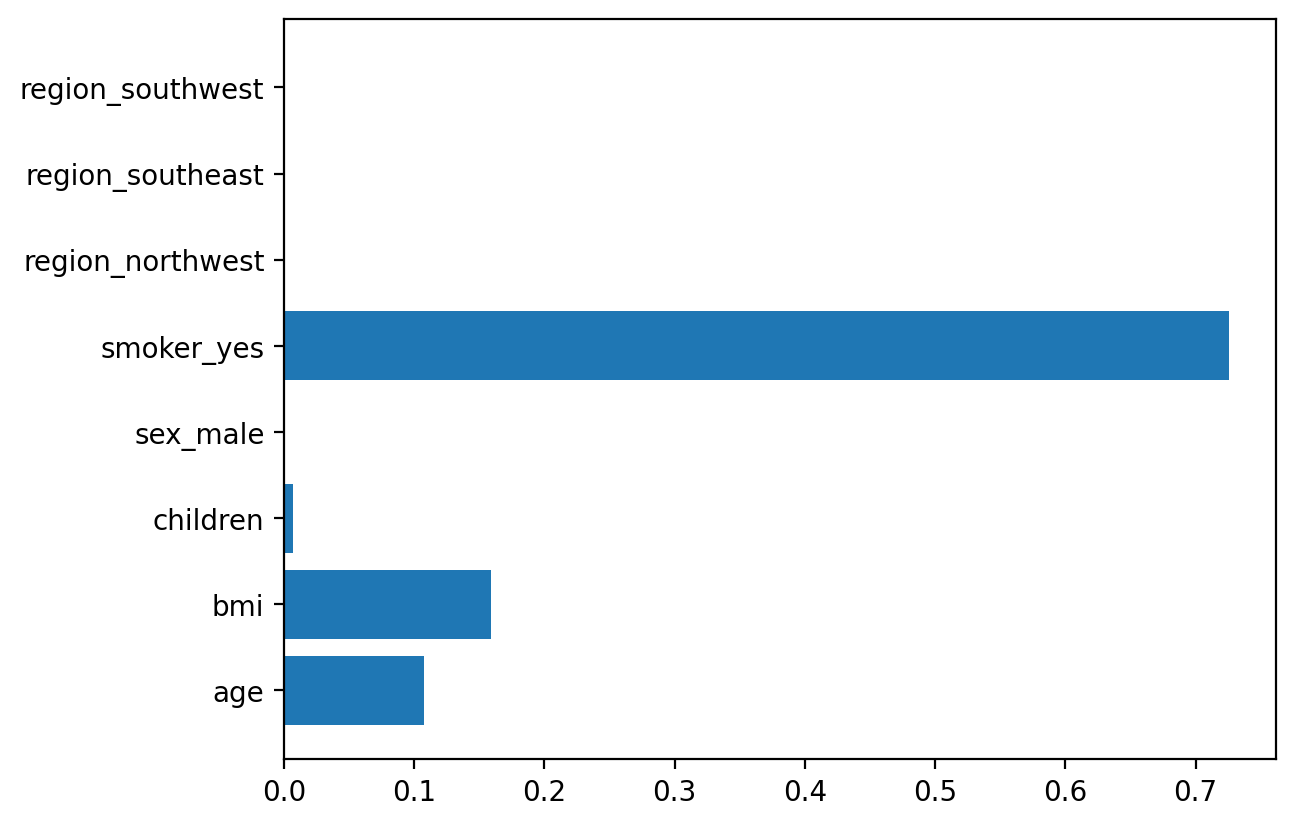

In [46]:
# 변수 중요도 시각화
plt.barh(list(x), model.best_estimator_.feature_importances_)
plt.show()



# 6.성능 튜닝
2) SVR

In [47]:
model_dt = SVR(kernel = 'poly', C = 1)

In [48]:
param = {
    'C': range(1, 3000)
}

model = GridSearchCV(model_dt,
                     param,
                     cv = 10,
                     scoring = 'r2'
                     )

In [49]:
model.fit(x_train_s, y_train)

GridSearchCV(cv=10, estimator=SVR(C=1, kernel='poly'),
             param_grid={'C': range(1, 3000)}, scoring='r2')

In [50]:
# 최적 파라미터, 예측 최고 성능
print(model.cv_results_['mean_test_score'])
print('최적 파라미터: ', model.best_params_)
print('최고 성능: ', model.best_score_)

[-0.07010132 -0.02280893  0.02113106 ...  0.81100887  0.81100993
  0.81101075]
최적 파라미터:  {'C': 2999}
최고 성능:  0.8110107473313851


In [51]:
result['SVR_After Tuning'] = model.best_score_

<BarContainer object of 9 artists>

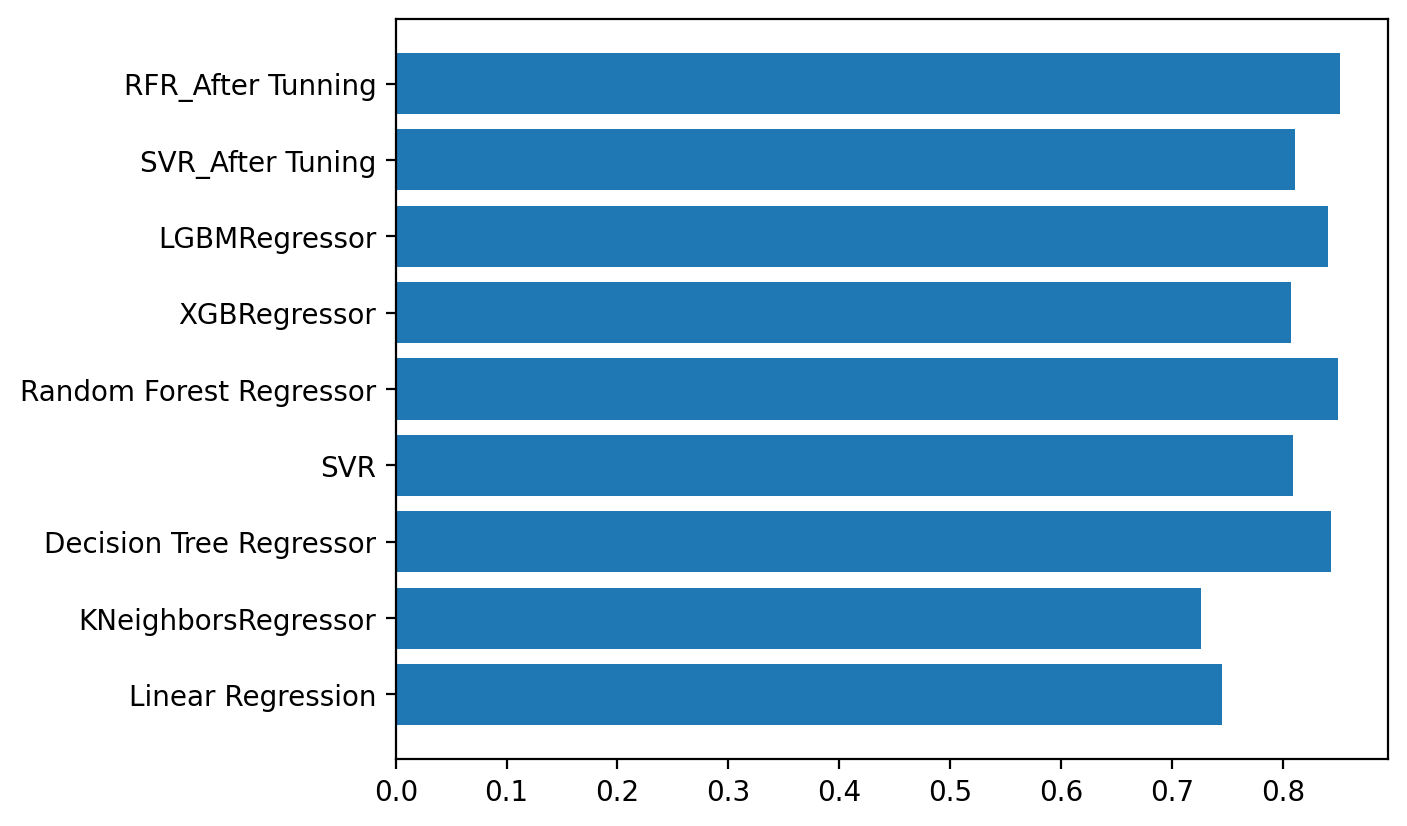

In [58]:
plt.barh(list(result.keys()), result.values())

# 7.성능 평가

- 최적 파라미터로 학습된 모델에 대해 최종 성능 평가를 진행합니다.

In [59]:
# 예측하기
y_pred = model.predict(x_test)

In [62]:
# 성능평가
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

result['final'] = r2_score(y_test, y_pred)


2493.156835384944
0.8560482679256518


<BarContainer object of 11 artists>

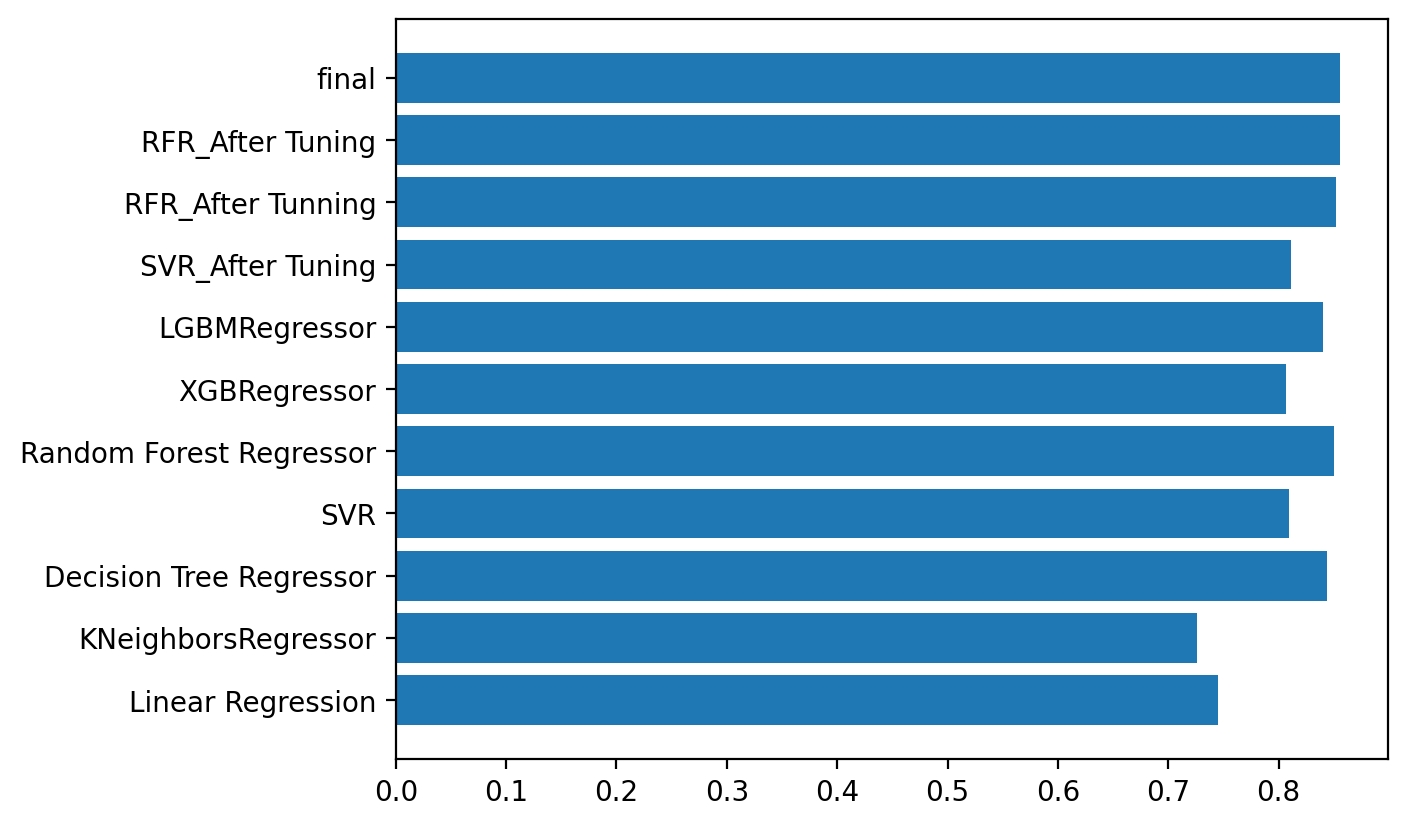

In [63]:
plt.barh(list(result.keys()), result.values())